In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_f = pd.read_csv('df_final.csv')

In [3]:
#df_f.drop(columns = ['album_artist_link', 'album_link', 'album_name', 'album_release_year', 'Unnamed: 0'], inplace = True)
df_f.dropna(inplace = True)


In [4]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 304
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           278 non-null    int64  
 1   album_release_year   278 non-null    int64  
 2   album_name           278 non-null    object 
 3   album_link           278 non-null    object 
 4   album_artist_link    278 non-null    object 
 5   total_albums_artist  278 non-null    float64
 6   users_have           278 non-null    float64
 7   users_want           278 non-null    float64
 8   user_rating          278 non-null    float64
 9   total_rating         278 non-null    float64
 10  lowest_price         278 non-null    float64
 11  median_price         278 non-null    float64
 12  highest_price        278 non-null    float64
 13  total_versions       278 non-null    float64
 14  years_since_release  278 non-null    int64  
dtypes: float64(9), int64(3), object(3)
memor

In [159]:
# percentile25_Y = df_f['highest_price'].quantile(0.25)
# percentile75_Y = df_f['highest_price'].quantile(0.75)
# df_f = df_f[df_f['highest_price'] > percentile25_Y]
# df_f = df_f[df_f['highest_price'] < percentile75_Y]

In [160]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 304
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_albums_artist  278 non-null    float64
 1   users_have           278 non-null    float64
 2   users_want           278 non-null    float64
 3   user_rating          278 non-null    float64
 4   total_rating         278 non-null    float64
 5   lowest_price         278 non-null    float64
 6   median_price         278 non-null    float64
 7   highest_price        278 non-null    float64
 8   total_versions       278 non-null    float64
 9   years_since_release  278 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.9 KB


In [189]:
def simple_regression(df):
    #seperate train and test 
    trainX = np.array(df.X[95:len(df.X)]).reshape(-1,1)
    trainY = np.array(df.Y[95:len(df.Y)]).reshape(-1,1)
    testX = np.array(df.X[:95]).reshape(-1,1)
    testY = np.array(df.Y[:95]).reshape(-1,1)
    #linear regression model
    model = linear_model.LinearRegression()
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    r2 = model.score(trainX, trainY) * 100
    adj_r2 = 100 *(1 - (1-model.score(trainX, trainY))*(len(trainY)-1)/(len(trainY)-trainX.shape[1]-1))
    rmsd = np.sqrt(mean_squared_error(testY, pred))
    
    plt.scatter(x = df.X, y = df.Y)
    plt.plot(testX, pred)
    plt.show()
    
    print({'model':model, 'r2':r2, 'adj_r2': adj_r2, 'rmsd':rmsd})
    
def iqr_filtering(df):
    iqr = 1
    percentile25_X = df.X.quantile(0.25)
    percentile75_X = df.X.quantile(0.75)
    df = df[df.X > percentile25_X]
    df = df[df.X < percentile75_X]

    return df

What determines the median price for a vinyl album? 
- Rarity? -> lower proportion of users have / users want means its more rare 
- total versions 
- user rating of album 
- years since release 

In [6]:
#calculate rarirty 
df_f['rarity'] = df_f['users_want'] / df_f['users_have'] 

In [7]:
df_f.head()

,Unnamed: 0,album_release_year,album_name,album_link,album_artist_link,total_albums_artist,users_have,users_want,user_rating,total_rating,lowest_price,median_price,highest_price,total_versions,years_since_release,rarity
0,0,1973,The Dark Side Of The Moon,https://www.discogs.com/master/10362-Pink-Floy...,https://www.discogs.com/artist/45467-Pink-Floyd,62.0,33460.0,10294.0,4.66,3245.0,10.00,28.98,250.00,111.0,49,0.307651
1,1,1967,Sgt. Pepper's Lonely Hearts Club Band,https://www.discogs.com/master/23934-The-Beatl...,https://www.discogs.com/artist/82730-The-Beatles,157.0,1498.0,1015.0,4.54,137.0,22.56,50.48,72.12,5.0,55,0.677570
2,2,1969,Abbey Road,https://www.discogs.com/master/24047-The-Beatl...,https://www.discogs.com/artist/82730-The-Beatles,157.0,978.0,899.0,4.52,122.0,9.02,45.11,89.99,27.0,53,0.919223
3,3,1975,Wish You Were Here,https://www.discogs.com/master/11703-Pink-Floy...,https://www.discogs.com/artist/45467-Pink-Floyd,62.0,3822.0,1115.0,4.52,361.0,11.36,18.18,75.00,22.0,47,0.291732
4,4,1977,Rumours,https://www.discogs.com/master/38722-Fleetwood...,https://www.discogs.com/artist/47333-Fleetwood...,120.0,4508.0,1077.0,4.35,531.0,5.68,17.05,39.77,18.0,45,0.238909


In [194]:
variables = ['total_albums_artist', 'users_have', 'users_want', 'user_rating',
       'total_rating', 'lowest_price', 'median_price', 'total_versions', 'years_since_release', 'rarity_1', 'rarity_2']

In [195]:
# variables.remove('highest_price')
print(variables)


['total_albums_artist', 'users_have', 'users_want', 'user_rating', 'total_rating', 'lowest_price', 'median_price', 'total_versions', 'years_since_release', 'rarity_1', 'rarity_2']


<AxesSubplot:xlabel='users_have', ylabel='Count'>

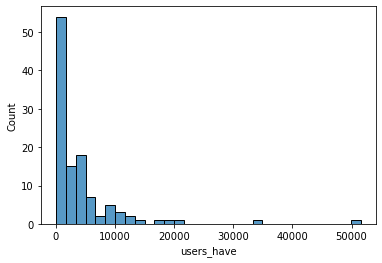

In [27]:
sns.histplot(df_f[df_f['rarity'] > 0.3]['users_have'])

<AxesSubplot:xlabel='users_have', ylabel='Count'>

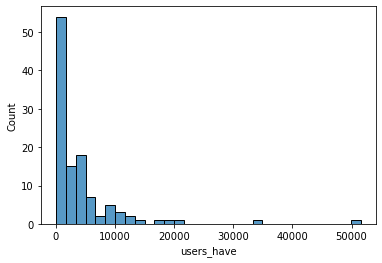

In [28]:
sns.histplot(df_f[df_f['rarity'] > 0.3]['users_have'])

<AxesSubplot:xlabel='users_want', ylabel='Count'>

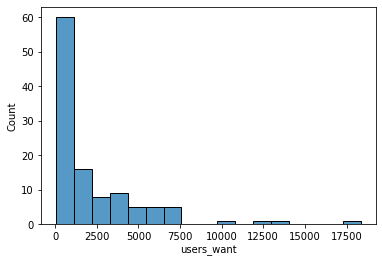

In [29]:
sns.histplot(df_f[df_f['rarity'] > 0.3]['users_want'])

<AxesSubplot:xlabel='users_have', ylabel='Count'>

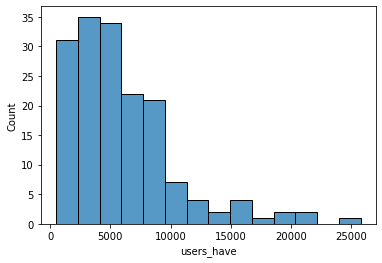

In [30]:
sns.histplot(df_f[df_f['rarity'] < 0.3]['users_have'])

<AxesSubplot:xlabel='users_want', ylabel='Count'>

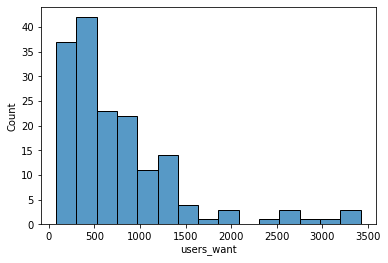

In [31]:
sns.histplot(df_f[df_f['rarity'] < 0.3]['users_want'])

<AxesSubplot:xlabel='users_have', ylabel='Count'>

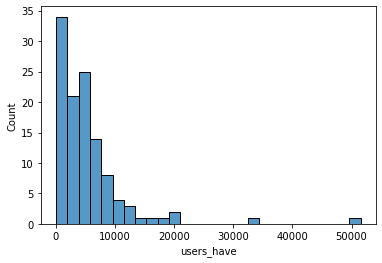

In [46]:
df_f[df_f['median_price'] > 20]['users_want']
sns.histplot(df_f[df_f['median_price'] > 20]['users_have'])

[Text(0.5, 1.0, 'Users_have vs. Median Price for Rarity < 0.3 and Median Price < 30')]

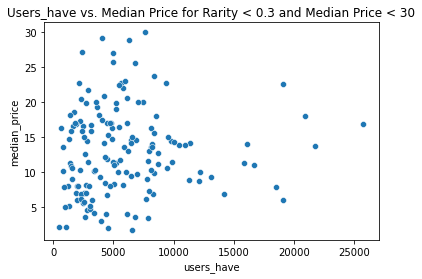

In [14]:
sns.scatterplot(x = 'users_have', y = 'median_price', data = df_f[(df_f['median_price'] < 30) & (df_f['rarity'] < 0.3)]).set(title = "Users_have vs. Median Price for Rarity < 0.3 and Median Price < 30")

[Text(0.5, 1.0, 'Users_want vs. Median Price for Rarity < 0.3 and Median Price < 30')]

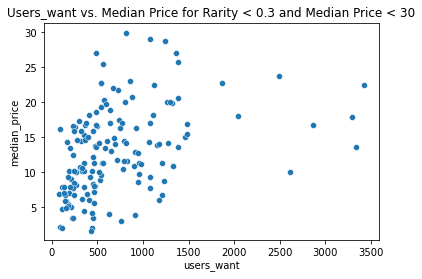

In [15]:
sns.scatterplot(x = 'users_want', y = 'median_price', data = df_f[(df_f['median_price'] < 30) & (df_f['rarity'] < 0.3)]).set(title = "Users_want vs. Median Price for Rarity < 0.3 and Median Price < 30")
                
                
                

<AxesSubplot:xlabel='rarity', ylabel='median_price'>

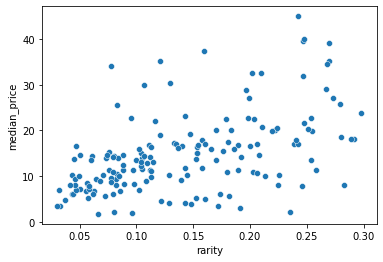

In [59]:
sns.scatterplot(x = 'rarity', y = 'median_price', data = df_f[(df_f['median_price'] < 100) & (df_f['rarity'] < 0.3)])


In [70]:
df_f[df_f['rarity'] > 2][['years_since_release','total_versions','album_name','rarity', 'users_have','users_want']]

,years_since_release,total_versions,album_name,rarity,users_have,users_want
16,52,6.0,Led Zeppelin III,2.155039,387.0,834.0
19,45,2.0,Animals,3.844961,129.0,496.0
131,54,3.0,Beggars Banquet,2.377193,228.0,542.0
217,53,2.0,David Bowie,6.015385,130.0,782.0
223,31,2.0,Achtung Baby,3.154122,279.0,880.0
224,33,2.0,Doolittle,2.760274,146.0,403.0
283,35,1.0,Kiss Me Kiss Me Kiss Me,2.411765,85.0,205.0
295,51,2.0,The Allman Brothers Band At Fillmore East,4.120690,58.0,239.0


In [90]:
df_f[df_f['album_name'] == "Achtung Baby"]['album_link']

223    https://www.discogs.com/master/20774-U2-Achtun...
Name: album_link, dtype: object

In [84]:
df_f[df_f['rarity']<2]['total_versions'].mean()

47.27037037037037

total_albums_artist


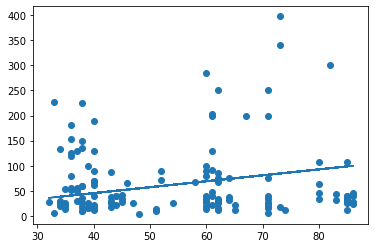

{'model': LinearRegression(), 'r2': 7.3908413801209605, 'adj_r2': 5.075612414623976, 'rmsd': 72.46424149299379}
users_have


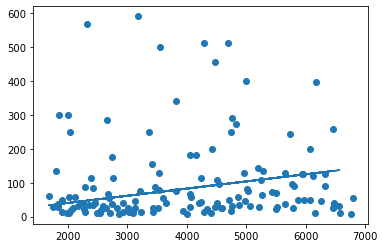

{'model': LinearRegression(), 'r2': 9.919012863123132, 'adj_r2': 7.666988184701218, 'rmsd': 136.47030602342056}
users_want


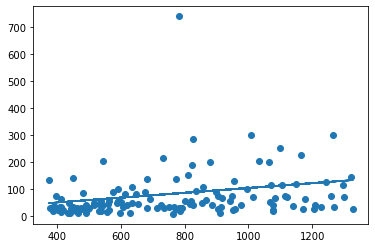

{'model': LinearRegression(), 'r2': 4.341511312696755, 'adj_r2': 2.0083774422747225, 'rmsd': 61.54126975357989}
user_rating


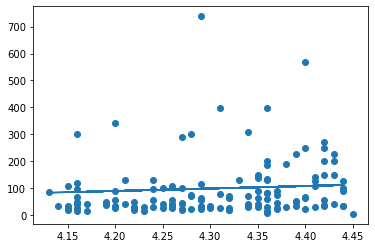

{'model': LinearRegression(), 'r2': 0.38949189535120166, 'adj_r2': -2.3774666631112717, 'rmsd': 94.28463787801732}
total_rating


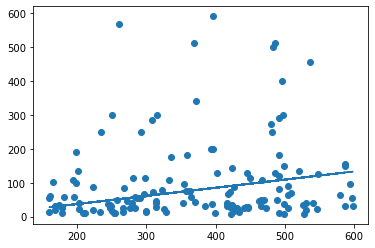

{'model': LinearRegression(), 'r2': 10.02417981672471, 'adj_r2': 7.829647617132629, 'rmsd': 133.1049448758436}
lowest_price


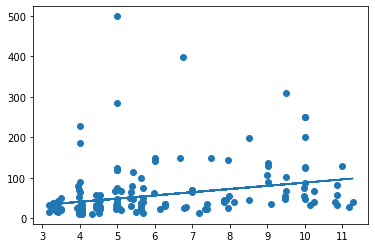

{'model': LinearRegression(), 'r2': 9.501272143411843, 'adj_r2': 7.293986098129201, 'rmsd': 75.37389643853332}
median_price


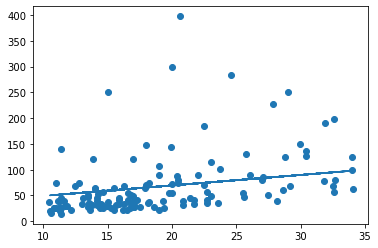

{'model': LinearRegression(), 'r2': 3.4563775205657787, 'adj_r2': 0.9809000210931118, 'rmsd': 49.91443084544659}
total_versions


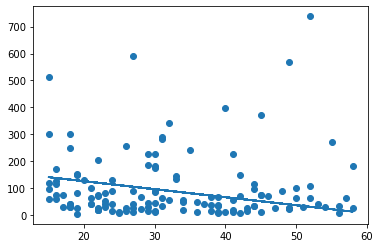

{'model': LinearRegression(), 'r2': 13.106913483760007, 'adj_r2': 10.624253869010293, 'rmsd': 140.60885850206165}
years_since_release


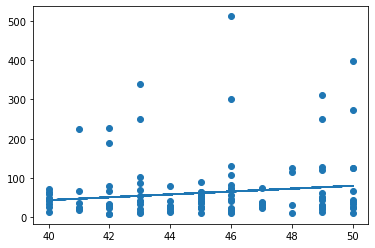

{'model': LinearRegression(), 'r2': 1.115144732159501, 'adj_r2': -3.829098031232525, 'rmsd': 78.08478487987257}
rarity_1


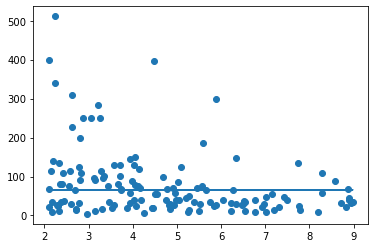

{'model': LinearRegression(), 'r2': 0.0018722955785865913, 'adj_r2': -2.4371064289195, 'rmsd': 91.2580364091207}
rarity_2


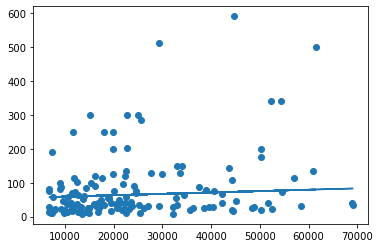

{'model': LinearRegression(), 'r2': 0.9872420841182561, 'adj_r2': -1.4277032309032434, 'rmsd': 111.96080646612788}


In [196]:
for var in variables:
    print(var)
    df_plot = pd.DataFrame()
    df_plot[var] = df_f[var]
    df_plot['highest_price'] = df_f['highest_price']
    df_plot.columns = ['X', 'Y']
    df_plot.dropna(inplace = True)
    
    df_plot = iqr_filtering(df_plot)
    df_plot.dropna(inplace = True)
    simple_regression(df_plot)

In [198]:
df_plot = pd.DataFrame()
df_plot['rarity_1'] = df_f['rarity_1']
df_plot['highest_price'] = df_f['highest_price']
df_plot.columns = ['X', 'Y']
df_plot = iqr_filtering(df_plot)
df_plot.dropna(inplace = True)

In [204]:
df_f.to_csv('data.csv')

In [213]:
df_f[df_f['median_price'] > 70]

,Unnamed: 0,album_release_year,album_name,album_link,album_artist_link,total_albums_artist,users_have,users_want,user_rating,total_rating,lowest_price,median_price,highest_price,total_versions,years_since_release,rarity
7,7,1971,Untitled,https://www.discogs.com/master/4300-Led-Zeppel...,https://www.discogs.com/artist/34278-Led-Zeppelin,61.0,752.0,1034.0,4.55,108.0,37.84,114.86,202.64,22.0,51,1.375000
8,8,1968,The Beatles,https://www.discogs.com/master/46402-The-Beatl...,https://www.discogs.com/artist/82730-The-Beatles,157.0,931.0,731.0,4.47,80.0,32.45,91.23,216.35,6.0,54,0.785177
12,12,1966,Revolver,https://www.discogs.com/master/45284-The-Beatl...,https://www.discogs.com/artist/82730-The-Beatles,157.0,3179.0,1655.0,4.65,396.0,27.00,105.19,590.91,27.0,56,0.520604
13,13,1959,Kind Of Blue,https://www.discogs.com/master/5460-Miles-Davi...,https://www.discogs.com/artist/23755-Miles-Davis,155.0,1840.0,3586.0,4.73,315.0,39.99,132.72,299.95,7.0,63,1.948913
20,20,1987,Appetite For Destruction,https://www.discogs.com/master/9467-Guns-N-Ros...,https://www.discogs.com/artist/124535-Guns-N-R...,17.0,3543.0,4730.0,4.55,483.0,5.00,230.00,499.00,13.0,35,1.335027
39,39,1986,Master Of Puppets,https://www.discogs.com/master/6495-Metallica-...,https://www.discogs.com/artist/18839-Metallica,134.0,2382.0,1104.0,4.63,281.0,43.77,73.86,113.64,16.0,36,0.463476
52,52,1979,Unknown Pleasures,https://www.discogs.com/master/4805-Joy-Divisi...,https://www.discogs.com/artist/3898-Joy-Division,8.0,7184.0,7470.0,4.70,1183.0,74.66,183.64,339.77,7.0,43,1.039811
60,60,1970,Black Sabbath,https://www.discogs.com/master/723-Black-Sabba...,https://www.discogs.com/artist/144998-Black-Sa...,36.0,3421.0,5465.0,4.54,586.0,95.02,271.49,153.85,19.0,52,1.597486
66,66,1992,Rage Against The Machine,https://www.discogs.com/master/7939-Rage-Again...,https://www.discogs.com/artist/12212-Rage-Agai...,11.0,4473.0,7147.0,4.69,536.0,75.00,198.86,454.53,12.0,30,1.597809
70,70,1983,Kill 'Em All,https://www.discogs.com/master/6387-Metallica-...,https://www.discogs.com/artist/18839-Metallica,134.0,1641.0,858.0,4.47,194.0,34.03,74.43,107.95,3.0,39,0.522852


In [219]:
df_f[df_f['median_price'] > 110]

,Unnamed: 0,album_release_year,album_name,album_link,album_artist_link,total_albums_artist,users_have,users_want,user_rating,total_rating,lowest_price,median_price,highest_price,total_versions,years_since_release,rarity
7,7,1971,Untitled,https://www.discogs.com/master/4300-Led-Zeppel...,https://www.discogs.com/artist/34278-Led-Zeppelin,61.0,752.0,1034.0,4.55,108.0,37.84,114.86,202.64,22.0,51,1.375000
13,13,1959,Kind Of Blue,https://www.discogs.com/master/5460-Miles-Davi...,https://www.discogs.com/artist/23755-Miles-Davis,155.0,1840.0,3586.0,4.73,315.0,39.99,132.72,299.95,7.0,63,1.948913
20,20,1987,Appetite For Destruction,https://www.discogs.com/master/9467-Guns-N-Ros...,https://www.discogs.com/artist/124535-Guns-N-R...,17.0,3543.0,4730.0,4.55,483.0,5.00,230.00,499.00,13.0,35,1.335027
52,52,1979,Unknown Pleasures,https://www.discogs.com/master/4805-Joy-Divisi...,https://www.discogs.com/artist/3898-Joy-Division,8.0,7184.0,7470.0,4.70,1183.0,74.66,183.64,339.77,7.0,43,1.039811
60,60,1970,Black Sabbath,https://www.discogs.com/master/723-Black-Sabba...,https://www.discogs.com/artist/144998-Black-Sa...,36.0,3421.0,5465.0,4.54,586.0,95.02,271.49,153.85,19.0,52,1.597486
66,66,1992,Rage Against The Machine,https://www.discogs.com/master/7939-Rage-Again...,https://www.discogs.com/artist/12212-Rage-Agai...,11.0,4473.0,7147.0,4.69,536.0,75.00,198.86,454.53,12.0,30,1.597809
75,75,1971,Hunky Dory,https://www.discogs.com/master/1718-David-Bowi...,https://www.discogs.com/artist/10263-David-Bowie,95.0,3462.0,4632.0,4.49,426.0,20.35,369.31,85.96,2.0,51,1.337955
121,121,1967,Axis: Bold As Love,https://www.discogs.com/master/24511-The-Jimi-...,https://www.discogs.com/artist/255672-The-Jimi...,30.0,2316.0,3413.0,4.40,260.0,51.13,135.13,567.57,49.0,55,1.473661
186,186,2001,Discovery,https://www.discogs.com/master/26647-Daft-Punk...,https://www.discogs.com/artist/1289-Daft-Punk,9.0,20639.0,13459.0,4.59,2801.0,18.00,149.32,371.62,45.0,21,0.652115
201,201,1963,With The Beatles,https://www.discogs.com/master/45729-The-Beatl...,https://www.discogs.com/artist/82730-The-Beatles,157.0,2002.0,1008.0,4.28,250.0,27.03,129.54,300.00,15.0,59,0.503497


In [221]:
print(df_f['median_price'].quantile(0.95))

108.92249999999989
